In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 

In [2]:
# get initial dataset
df=pd.read_excel('dataset_a_estudiar.xlsx',   skiprows = range(0, 2))
df.iloc[0,0]="region"
df.columns= df.iloc[0]
df.set_index('region',inplace=True)
df.drop('region',inplace=True)
df.drop('codigo region',axis=1,inplace=True)
df=df.astype(float)
# df.describe().round(2)

In [4]:
df.columns


Index(['demografico', 'remuneracion promedio', 'delitos por cada 100.000',
       'violaciones por cada 100000', 'Allegamiento', 'Hacinamiento Medio',
       'Hacinamiento Crítico', 'Saneamiento Deficitario*',
       'Precariedad de la vivienda', 'Agua Potable', 'Alcantarillado',
       'Tratamiento de Aguas Servidas', 'inversion publica',
       'cantidad de estudiantes', 'bono retencion escolar',
       'subcidio discapacidad mental', 'subcidio familiar',
       'subcidio agua potable', 'bono solidario', 'subcidio cedula',
       'bono ingreso etico familiar', '0 AÑOS DE ESCOLARIDAD',
       '1 AÑO DE ESCOLARIDAD', '2 AÑOS DE ESCOLARIDAD',
       '3 AÑOS DE ESCOLARIDAD', '4 AÑOS DE ESCOLARIDAD',
       '5 AÑOS DE ESCOLARIDAD', '6 AÑOS DE ESCOLARIDAD',
       '7 AÑOS DE ESCOLARIDAD', '8 AÑOS DE ESCOLARIDAD',
       '9 AÑOS DE ESCOLARIDAD', '10 AÑOS DE ESCOLARIDAD',
       '11 AÑOS DE ESCOLARIDAD', '12 AÑOS DE ESCOLARIDAD',
       '13 AÑOS DE ESCOLARIDAD', '14 AÑOS DE ESCOLARIDAD',
   

In [5]:
# change to english column names
df.columns = [
               'demographic', 'average remuneration',
               'crimes per 100,000', 'violations per 100,000',
               'allegation', 'medium overcrowding', 'critical overcrowding',
               'deficient sanitation', 'precarious housing',
               'Potable Water', 'Sewer', 'Sewage Treatment',
               'public investment', 'number of students',
               'school retention bonus', 'mental disability subcide',
               'family subcide', 'drinking water subcide', 'solidarity bonus',
               'subcide cedula', 'family ethical income bonus',
               '0 scholar years', '1 scholar years',
               '2 scholar years', '3 scholar years',
               '4 scholar years', '5 scholar years',
               '6 scholar years', '7 scholar years',
               '8 scholar years', '9 scholar years',
               '10 scholar years', '11 scholar years',
               '12 scholar years', '13 scholar years',
               '14 scholar years', '15 scholar years',
               '16 scholar years', '17scholar years',
               '18 scholar years or more'
            ]

In [6]:
# change long of region names
df.reset_index(inplace=True)
df.iloc[0,0]='Arica'
df.iloc[6,0]='O’Higgins'
df.iloc[12,0]='Aisén'
df.iloc[13,0]='Magallanes'
df.iloc[14,0]='Santiago'

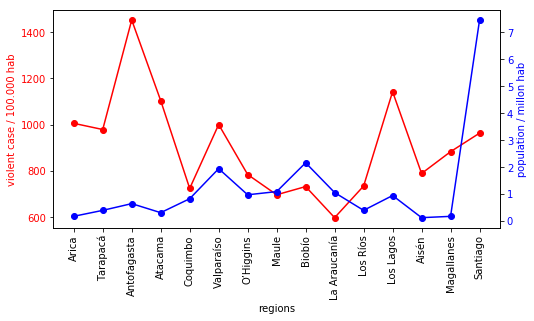

In [7]:
# plot of the case violent vs the population of the region
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.set_ylabel('violent case / 100.000 hab',color='red')

ax1.set_xticks(np.arange(len(df.index)))
ax1.plot(df.index, df['crimes per 100,000'], color='red', marker='o')

ax1.set_xlabel('regions', color='black')
ax1.set_xticklabels(df['region'], rotation=90)

ax1.tick_params(axis='y', labelcolor='red')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('population / millon hab', color='blue')  # we already handled the x-label with ax1
ax2.plot(df.index, df['demographic']/1000000, color='blue', marker='o')
ax2.tick_params(axis='y', labelcolor='blue')

plt.savefig('output.png')
plt.show()


In [8]:
# add new columns

# Add desity column
df['density/per km2']=[3.4,7.8,4.81,3.8,18.67,110.75,55.81,36.47,65.16,30.06,20.88,17.06,0.95,1.26,461.77]
#Add PIB column
df['PIB/usd']=[18.308,29.129,30.698,28.979,14.338,14.510,14.840,12.695,13.281,11.064,11.824,12.196,13.085,15.601,24.850]
# Add column capital of region to use as reference for the geocoder
df['capital']=['arica','iquique','antofagasta','copiapo','la serena','valparaiso','rancagua','talca','concepcion','temuco','valdivia','puerto montt','coyhaique','punta arenas','santiago']

In [9]:
df

,region,demographic,average remuneration,"crimes per 100,000","violations per 100,000",allegation,medium overcrowding,critical overcrowding,deficient sanitation,precarious housing,...,12 scholar years,13 scholar years,14 scholar years,15 scholar years,16 scholar years,17scholar years,18 scholar years or more,density/per km2,PIB/usd,capital
0,Arica,164933.0,375252.0,1005.639149,6.487995,34.3,19.9,3.3,12.8,23.5,...,61899.0,4551.0,10029.0,8648.0,6861.0,15177.0,1930.0,3.40,18.308,arica
1,Tarapacá,385457.0,459563.0,978.908480,1.271723,39.2,21.5,3.9,30.2,25.1,...,88213.0,6020.0,12913.0,12577.0,11075.0,22425.0,2866.0,7.80,29.129,iquique
2,Antofagasta,635800.0,579017.0,1452.540381,2.955144,28.5,21.5,3.5,15.1,14.5,...,167396.0,11761.0,30732.0,23735.0,23268.0,46292.0,6125.0,4.81,30.698,antofagasta
3,Atacama,299954.0,466183.0,1103.930592,3.920968,19.9,19.0,3.0,15.2,20.1,...,73582.0,4881.0,11020.0,10504.0,8853.0,17039.0,1480.0,3.80,28.979,copiapo
4,Coquimbo,817990.0,396433.0,724.207164,2.504463,14.8,16.6,2.1,19.1,10.3,...,188197.0,12293.0,28321.0,25172.0,23726.0,45363.0,5278.0,18.67,14.338,la serena
5,Valparaíso,1934895.0,379660.0,1000.416674,2.671719,18.1,15.0,2.2,12.4,10.2,...,459458.0,38720.0,78047.0,90590.0,59127.0,136468.0,22268.0,110.75,14.510,valparaiso
6,O’Higgins,964325.0,341259.0,784.271108,2.716875,17.0,17.0,2.1,21.6,13.9,...,212734.0,12423.0,29965.0,27753.0,24597.0,47212.0,5397.0,55.81,14.840,rancagua
7,Maule,1083275.0,306252.0,696.743799,2.976690,13.1,18.8,2.3,21.2,12.0,...,238438.0,13580.0,26912.0,30879.0,24631.0,53903.0,6932.0,36.47,12.695,talca
8,Biobío,2154148.0,359360.0,732.158965,1.964209,18.4,17.5,2.5,20.4,10.0,...,351368.0,32594.0,62770.0,67707.0,52852.0,106006.0,16553.0,65.16,13.281,concepcion
9,La Araucanía,1046770.0,322536.0,597.679971,3.709738,10.9,17.6,2.8,29.4,7.1,...,214489.0,14860.0,28357.0,30168.0,22369.0,56903.0,7924.0,30.06,11.064,temuco


In [10]:
# reduce data using correlation between variables, strong correlation means lineal depencdency
pearson = df.corr(method="pearson")

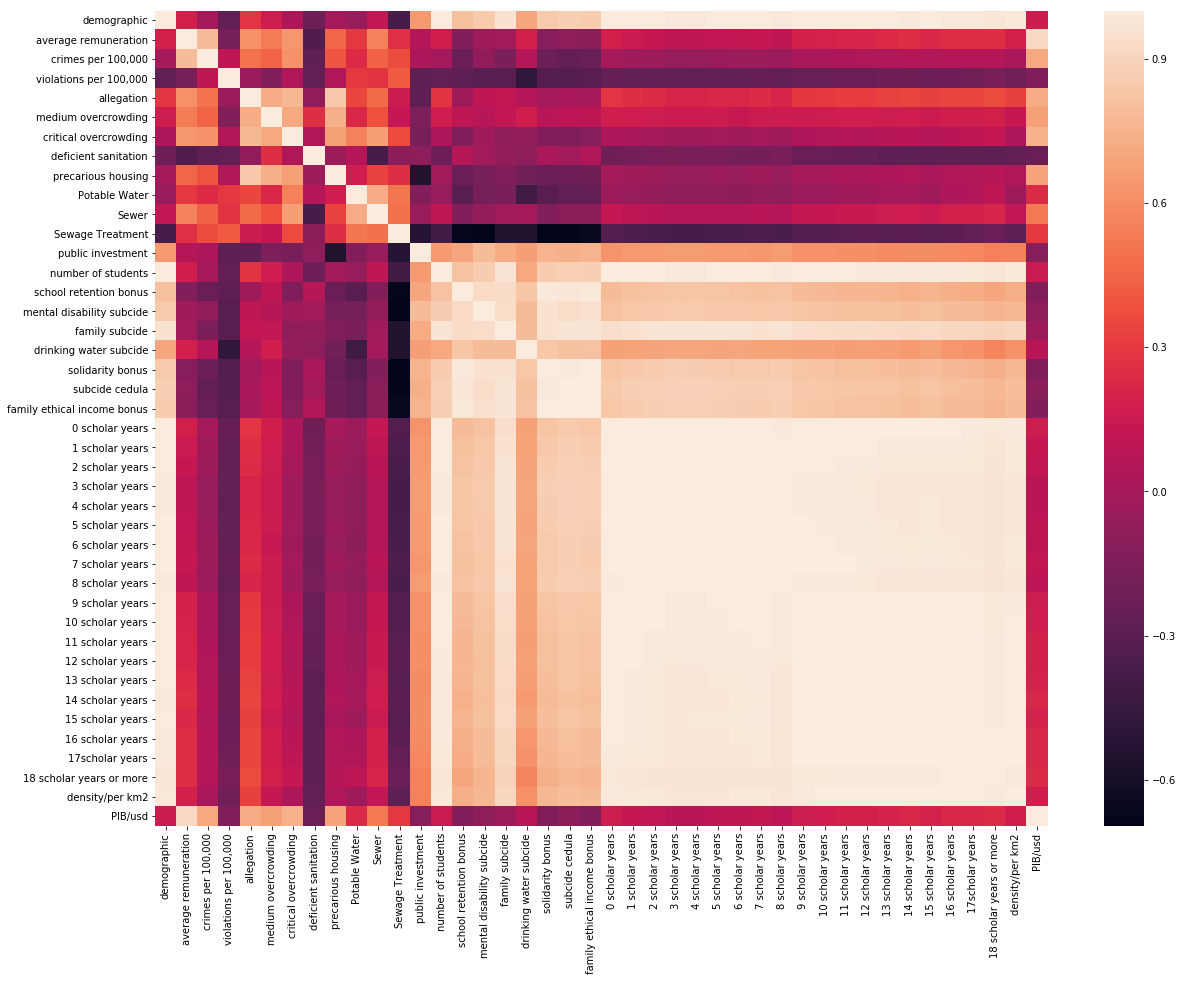

In [11]:
plt.subplots(figsize=(20,15))
sns.heatmap(pearson)

In [12]:
# reduce the educational params to only one avg_edu for each region
aux_edu=pd.DataFrame()
for index, row in df.iterrows():
    trans=df.iloc[[index],23:40].T.rename(columns={index: 'frecuencia'})  
    trans.reset_index(inplace=True)
    trans['xi/fi']=trans['frecuencia']*trans.index
    df.loc[index,'avg_edu']= (trans['xi/fi'].sum())/trans['frecuencia'].sum()
    

In [13]:
# delete the redundant educational columns
columns = [ 
           '0 scholar years', '1 scholar years',
           '2 scholar years', '3 scholar years', '4 scholar years',
           '5 scholar years', '6 scholar years', '7 scholar years',
           '8 scholar years', '9 scholar years', '10 scholar years',
           '11 scholar years', '12 scholar years', '13 scholar years',
           '14 scholar years', '15 scholar years', '16 scholar years',
           '17scholar years', '18 scholar years or more'
            ]
df.drop(columns=columns, inplace=True)

In [14]:
# use pinguin to calculeate the correlation and see the relation between case of violent and the rest of variables
conda install -c conda-forge pingouin

SyntaxError: invalid syntax (<ipython-input-14-5ee0c4c20b59>, line 2)

In [15]:
df.columns

Index(['region', 'demographic', 'average remuneration', 'crimes per 100,000',
       'violations per 100,000', 'allegation', 'medium overcrowding',
       'critical overcrowding', 'deficient sanitation', 'precarious housing',
       'Potable Water', 'Sewer', 'Sewage Treatment', 'public investment',
       'number of students', 'school retention bonus',
       'mental disability subcide', 'family subcide', 'drinking water subcide',
       'solidarity bonus', 'subcide cedula', 'family ethical income bonus',
       'density/per km2', 'PIB/usd', 'capital', 'avg_edu'],
      dtype='object')

In [16]:
import pingouin as pg

In [17]:
# Calculate the Pearson correlation between IQ and the personality dimensions
corr = pg.pairwise_corr(df, columns=[['crimes per 100,000'], 
                                     [ 
                                       'index', 'region', 'demographic', 'average remuneration',
                                        'violations per 100,000', 'allegation',
                                       'medium overcrowding', 'critical overcrowding',
                                       'deficient sanitation *', 'precarious housing', 'Potable Water',
                                       'Sewer', 'Sewage Treatment', 'public investment', 'number of students',
                                       'school retention bonus', 'mental disability subcide', 'family subcide',
                                       'drinking water subcide', 'solidarity bonus', 'subcide cedula',
                                       'family ethical income bonus', 'density/per km2', 'PIB/usd', 'avg_edu'
                                     ]], method='pearson')
corr.sort_values(by=['r']).tail(5)
# corr['r']

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
3,"crimes per 100,000",allegation,pearson,two-sided,15,0.500,"[-0.02, 0.81]",0.250,0.125,0.549,0.057603,1.663,0.499
21,"crimes per 100,000",avg_edu,pearson,two-sided,15,0.564,"[0.07, 0.84]",0.318,0.205,0.639,0.028473,2.865,0.624
5,"crimes per 100,000",critical overcrowding,pearson,two-sided,15,0.621,"[0.16, 0.86]",0.386,0.284,0.727,0.013446,5.196,0.735
20,"crimes per 100,000",PIB/usd,pearson,two-sided,15,0.714,"[0.32, 0.9]",0.510,0.428,0.895,0.002789,18.691,0.889
1,"crimes per 100,000",average remuneration,pearson,two-sided,15,0.786,"[0.46, 0.93]",0.618,0.555,1.061,0.000507,76.935,0.965


In [18]:
name_kmeans=corr[['r2','Y']].sort_values(by='r2' ,ascending=False).head(10)
name_kmeans

,r2,Y
1,0.618,average remuneration
20,0.510,PIB/usd
5,0.386,critical overcrowding
21,0.318,avg_edu
3,0.250,allegation
4,0.200,medium overcrowding
8,0.193,Sewer
6,0.154,precarious housing
9,0.136,Sewage Treatment
17,0.070,subcide cedula


In [19]:
name_kmeans['Y']

1      average remuneration
20                  PIB/usd
5     critical overcrowding
21                  avg_edu
3                allegation
4       medium overcrowding
8                     Sewer
6        precarious housing
9          Sewage Treatment
17           subcide cedula
Name: Y, dtype: object

In [20]:
# use kmeans to create clouster , this help to find similarity between the regions
df_kmeans=df[name_kmeans['Y']]
df_kmeans

,average remuneration,PIB/usd,critical overcrowding,avg_edu,allegation,medium overcrowding,Sewer,precarious housing,Sewage Treatment,subcide cedula
0,375252.0,18.308,3.3,9.585291,34.3,19.9,99.6,23.5,99.6,551.8
1,459563.0,29.129,3.9,9.542109,39.2,21.5,97.3,25.1,97.3,626.2
2,579017.0,30.698,3.5,9.874006,28.5,21.5,99.7,14.5,99.7,1326.8
3,466183.0,28.979,3.0,9.247164,19.9,19.0,95.7,20.1,95.7,2129.7
4,396433.0,14.338,2.1,9.134618,14.8,16.6,96.0,10.3,93.3,3220.9
5,379660.0,14.510,2.2,9.634939,18.1,15.0,91.8,10.2,91.7,6627.8
6,341259.0,14.840,2.1,8.701390,17.0,17.0,85.2,13.9,85.2,4736.8
7,306252.0,12.695,2.3,8.528320,13.1,18.8,95.6,12.0,94.7,7260.2
8,359360.0,13.281,2.5,9.216265,18.4,17.5,92.1,10.0,62.4,16321.5
9,322536.0,11.064,2.8,8.684432,10.9,17.6,94.4,7.1,93.9,9582.1


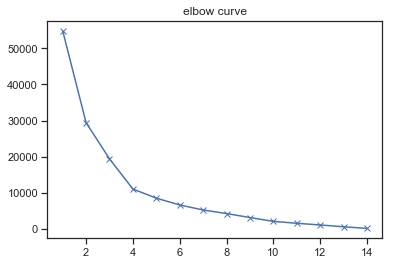

In [21]:
# because kmenas need a n_cluster number as a input we need to calculate the best n_cluster number

# we can find the optimal n_cluster number using the elbow method
res = list()
n_cluster = range(1,15)
for n in n_cluster:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(df_kmeans)
    res.append(np.average(np.min(cdist(df_kmeans, kmeans.cluster_centers_, 'euclidean'), axis=1)))

plt.plot(n_cluster, res,'bx-')
plt.title('elbow curve')
plt.show()

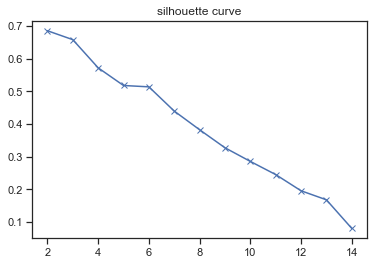

In [222]:
# we can find the confirmation of k optimal n_cluster number using the silhouthe method
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
n_cluster = range(2,15)
for k in n_cluster:
  kmeans = KMeans(n_clusters = k).fit(df_kmeans)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_kmeans, labels, metric = 'euclidean'))

plt.plot(n_cluster, sil,'bx-')
plt.title('silhouette curve')
plt.show()

In [226]:
#Cluster the data using the optimal n_cluster 
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_kmeans)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

#Glue back to originaal data
df['clusters'] = labels
print(labels)

[0 1 1 1 0 0 0 0 0 0 0 0 0 0 1]


In [24]:
# analisis of moss importan parameters precent in each cluster
kmeans.cluster_centers_

array([[3.55222364e+05, 1.37947273e+01, 2.52727273e+00, 9.03098490e+00,
        1.74090909e+01, 1.67909091e+01, 9.38636364e+01, 1.13909091e+01,
        9.07363636e+01, 5.16234545e+03],
       [4.92593000e+05, 2.84140000e+01, 3.37500000e+00, 9.64127031e+00,
        3.02750000e+01, 2.04000000e+01, 9.78500000e+01, 1.89250000e+01,
        9.49250000e+01, 6.20387500e+03]])

In [265]:
df

,region,demographic,average remuneration,"crimes per 100,000","violations per 100,000",allegation,medium overcrowding,critical overcrowding,deficient sanitation,precarious housing,...,family subcide,drinking water subcide,solidarity bonus,subcide cedula,family ethical income bonus,density/per km2,PIB/usd,capital,avg_edu,clusters
0,Arica,164933.0,375252.0,1005.639149,6.487995,34.3,19.9,3.3,12.8,23.5,...,1.897140e+06,1.142910e+06,235167.414,551.8,41935.5,3.40,18.308,arica,9.585291,0
1,Tarapacá,385457.0,459563.0,978.908480,1.271723,39.2,21.5,3.9,30.2,25.1,...,3.017930e+06,2.445483e+06,282957.570,626.2,47865.0,7.80,29.129,iquique,9.542109,1
2,Antofagasta,635800.0,579017.0,1452.540381,2.955144,28.5,21.5,3.5,15.1,14.5,...,2.329840e+06,4.962593e+06,449222.547,1326.8,58186.5,4.81,30.698,antofagasta,9.874006,1
3,Atacama,299954.0,466183.0,1103.930592,3.920968,19.9,19.0,3.0,15.2,20.1,...,2.856432e+06,2.340567e+06,582265.252,2129.7,86250.0,3.80,28.979,copiapo,9.247164,1
4,Coquimbo,817990.0,396433.0,724.207164,2.504463,14.8,16.6,2.1,19.1,10.3,...,7.835916e+06,3.372898e+06,733657.965,3220.9,122827.5,18.67,14.338,la serena,9.134618,0
5,Valparaíso,1934895.0,379660.0,1000.416674,2.671719,18.1,15.0,2.2,12.4,10.2,...,1.566108e+07,6.989561e+06,1961291.638,6627.8,269488.5,110.75,14.510,valparaiso,9.634939,0
6,O’Higgins,964325.0,341259.0,784.271108,2.716875,17.0,17.0,2.1,21.6,13.9,...,8.326880e+06,2.129837e+06,1136133.437,4736.8,160473.0,55.81,14.840,rancagua,8.701390,0
7,Maule,1083275.0,306252.0,696.743799,2.976690,13.1,18.8,2.3,21.2,12.0,...,1.371559e+07,4.126260e+06,1704271.669,7260.2,254683.5,36.47,12.695,talca,8.528320,0
8,Biobío,2154148.0,359360.0,732.158965,1.964209,18.4,17.5,2.5,20.4,10.0,...,2.479900e+07,7.230850e+06,3797628.520,16321.5,554122.5,65.16,13.281,concepcion,9.216265,0
9,La Araucanía,1046770.0,322536.0,597.679971,3.709738,10.9,17.6,2.8,29.4,7.1,...,1.551091e+07,4.531012e+06,2336260.046,9582.1,381486.0,30.06,11.064,temuco,8.684432,0


In [258]:
# characteristic elements of centroids
# red is clouster 0
# green is cluster 1
array2=pd.DataFrame(name_kmeans['Y'])
array2['cluster_red']=kmeans.cluster_centers_[0]
array2['cluster_green']=kmeans.cluster_centers_[1]
array2

,Y,cluster_red,cluster_green
1,average remuneration,355222.363636,492593.00000
20,PIB/usd,13.794727,28.41400
5,critical overcrowding,2.527273,3.37500
21,avg_edu,9.030985,9.64127
3,allegation,17.409091,30.27500
4,medium overcrowding,16.790909,20.40000
8,Sewer,93.863636,97.85000
6,precarious housing,11.390909,18.92500
9,Sewage Treatment,90.736364,94.92500
17,subcide cedula,5162.345455,6203.87500


In [270]:
df_predictor=pd.DataFrame()
df_predictor['region']=df['region']
df_predictor['clouster_predictors']=df['clusters']
df_predictor


,region,clouster_predictors
0,Arica,0
1,Tarapacá,1
2,Antofagasta,1
3,Atacama,1
4,Coquimbo,0
5,Valparaíso,0
6,O’Higgins,0
7,Maule,0
8,Biobío,0
9,La Araucanía,0


In [29]:
df

,region,demographic,average remuneration,"crimes per 100,000","violations per 100,000",allegation,medium overcrowding,critical overcrowding,deficient sanitation,precarious housing,...,family subcide,drinking water subcide,solidarity bonus,subcide cedula,family ethical income bonus,density/per km2,PIB/usd,capital,avg_edu,clusters
0,Arica,164933.0,375252.0,1005.639149,6.487995,34.3,19.9,3.3,12.8,23.5,...,1.897140e+06,1.142910e+06,235167.414,551.8,41935.5,3.40,18.308,arica,9.585291,0
1,Tarapacá,385457.0,459563.0,978.908480,1.271723,39.2,21.5,3.9,30.2,25.1,...,3.017930e+06,2.445483e+06,282957.570,626.2,47865.0,7.80,29.129,iquique,9.542109,1
2,Antofagasta,635800.0,579017.0,1452.540381,2.955144,28.5,21.5,3.5,15.1,14.5,...,2.329840e+06,4.962593e+06,449222.547,1326.8,58186.5,4.81,30.698,antofagasta,9.874006,1
3,Atacama,299954.0,466183.0,1103.930592,3.920968,19.9,19.0,3.0,15.2,20.1,...,2.856432e+06,2.340567e+06,582265.252,2129.7,86250.0,3.80,28.979,copiapo,9.247164,1
4,Coquimbo,817990.0,396433.0,724.207164,2.504463,14.8,16.6,2.1,19.1,10.3,...,7.835916e+06,3.372898e+06,733657.965,3220.9,122827.5,18.67,14.338,la serena,9.134618,0
5,Valparaíso,1934895.0,379660.0,1000.416674,2.671719,18.1,15.0,2.2,12.4,10.2,...,1.566108e+07,6.989561e+06,1961291.638,6627.8,269488.5,110.75,14.510,valparaiso,9.634939,0
6,O’Higgins,964325.0,341259.0,784.271108,2.716875,17.0,17.0,2.1,21.6,13.9,...,8.326880e+06,2.129837e+06,1136133.437,4736.8,160473.0,55.81,14.840,rancagua,8.701390,0
7,Maule,1083275.0,306252.0,696.743799,2.976690,13.1,18.8,2.3,21.2,12.0,...,1.371559e+07,4.126260e+06,1704271.669,7260.2,254683.5,36.47,12.695,talca,8.528320,0
8,Biobío,2154148.0,359360.0,732.158965,1.964209,18.4,17.5,2.5,20.4,10.0,...,2.479900e+07,7.230850e+06,3797628.520,16321.5,554122.5,65.16,13.281,concepcion,9.216265,0
9,La Araucanía,1046770.0,322536.0,597.679971,3.709738,10.9,17.6,2.8,29.4,7.1,...,1.551091e+07,4.531012e+06,2336260.046,9582.1,381486.0,30.06,11.064,temuco,8.684432,0


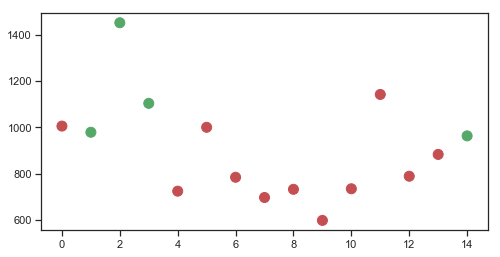

In [224]:
# red is clouster 0
# green is cluster 1

categories = df['clusters']
colormap = np.array(['r', 'g', 'b'])
plt.figure(figsize=(8,4))
plt.scatter(df.index, df['crimes per 100,000'], s=100, c=colormap[categories])
plt.savefig('ScatterClassPlot.png')
plt.show()

In [225]:
# Dataframe final with values of clusters

df_final=df[['region','capital','clusters']]
df_final['target']=df['crimes per 100,000']
df_final.set_index('region')

e:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,capital,clusters,target
region,,,
Arica,arica,0,1005.639149
Tarapacá,iquique,1,978.908480
Antofagasta,antofagasta,1,1452.540381
Atacama,copiapo,1,1103.930592
Coquimbo,la serena,0,724.207164
Valparaíso,valparaiso,0,1000.416674
O’Higgins,rancagua,0,784.271108
Maule,talca,0,696.743799
Biobío,concepcion,0,732.158965


In [227]:
#Cluster the data using the optimal n_cluster 
kmeans_only_target = KMeans(n_clusters=2, random_state=0).fit(df_final['target'].values.reshape(-1,1))
labels_only_target = kmeans_only_target.labels_
centroids_only_target = kmeans_only_target.cluster_centers_

#Glue back to orcentroids_only_targetiginaal data
df_final['clusters_target'] = labels_only_target
print(labels_only_target)


[1 1 1 1 0 1 0 0 0 0 0 1 0 0 1]


e:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


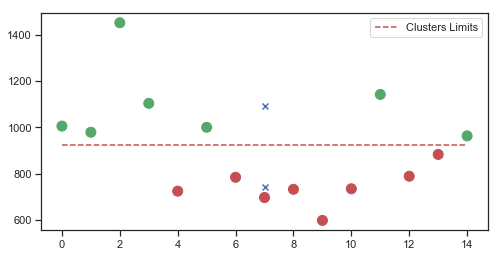

In [228]:
categories = df_final['clusters_target']
colormap = np.array(['r', 'g', 'b'])
plt.figure(figsize=(8,4))
plt.scatter(df.index, df['crimes per 100,000'], s=100, c=colormap[categories])
plt.scatter(7,centroids_only_target[0,0], marker="x", color='b')
plt.scatter(7,centroids_only_target[1,0], marker="x", color='b')

plt.plot([0,14],[923,923], 'r--',label='cluster divition')
plt.legend(['Clusters Limits'])


plt.savefig('ScatterClassPlot.png')
plt.show()

### Use Api Geocoder to get the coord of each region

In [121]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Capstone_Coursera")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


In [126]:
df_coord=pd.DataFrame()

In [90]:
# df_coord.drop(columns='geocode',inplace=True)

In [127]:
# geocode return a object, where .point has the long,lat
df_coord.loc[:,'capital']=df['capital']
df_coord.loc[:,'geocode'] = df_coord['capital'].apply(geocode)

In [128]:
df_coord.loc[:,'point'] = df_coord['geocode'].apply(lambda loc: tuple(loc.point) if loc else print("error"))

In [129]:
df_coord.loc[:,'longitude'] = pd.Series()
df_coord.loc[:,'latitude'] = pd.Series()
for index, row in df_coord.iterrows():
    df_coord.loc[index, 'longitude']=df_coord['point'][index][0]
    df_coord.loc[index, 'latitude']=df_coord['point'][index][1]

In [130]:
df_coord

,capital,geocode,point,longitude,latitude
0,arica,"(Arica, Provincia de Arica, Región de Arica y ...","(-18.478518, -70.3210596, 0.0)",-18.478518,-70.321060
1,iquique,"(Iquique, Provincia de Iquique, Región de Tara...","(-20.2140657, -70.1524646, 0.0)",-20.214066,-70.152465
2,antofagasta,"(Antofagasta, Provincia de Antofagasta, Región...","(-23.6463741, -70.3980033, 0.0)",-23.646374,-70.398003
3,copiapo,"(Copiapó, Provincia de Copiapó, Región de Atac...","(-27.3664897, -70.3322733, 0.0)",-27.366490,-70.332273
4,la serena,"(La Serena, Provincia de Elqui, Región de Coqu...","(-29.9026615, -71.2520136, 0.0)",-29.902662,-71.252014
5,valparaiso,"(Valparaíso, Provincia de Valparaíso, Región d...","(-33.0458456, -71.6196749, 0.0)",-33.045846,-71.619675
6,rancagua,"(Rancagua, Provincia de Cachapoal, Región del ...","(-34.170249, -70.7407427, 0.0)",-34.170249,-70.740743
7,talca,"(Talca, Provincia de Talca, Región del Maule, ...","(-35.4266305, -71.6661153, 0.0)",-35.426631,-71.666115
8,concepcion,"(Concepción, Provincia de Concepción, Región d...","(-36.8270776, -73.0502683, 0.0)",-36.827078,-73.050268
9,temuco,"(Temuco, Provincia de Cautín, Región de la Ara...","(-38.7362442, -72.5905979, 0.0)",-38.736244,-72.590598


### Use Api Foursquare to get the venues of each region

In [133]:
CLIENT_ID = 'YPCC45XDJWEFJL5DD5BRWI0XGZCG22QVV4KJFXQZ54QWONRH' # your Foursquare ID
CLIENT_SECRET = 'X1AOOW5ZS14PNG21WFZLNUJ0TMBJBQB450U00FYOLHTCH1NF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT=80

In [134]:
def getNearbyVenues(names, latitudes, longitudes, radius=100000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        print(url)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [135]:
chile_venues = getNearbyVenues(names=df_coord['capital'],
                                   latitudes=df_coord['longitude'],
                                   longitudes=df_coord['latitude']
                                  )
    
# chile_venues.head()

arica
https://api.foursquare.com/v2/venues/explore?&client_id=YPCC45XDJWEFJL5DD5BRWI0XGZCG22QVV4KJFXQZ54QWONRH&client_secret=X1AOOW5ZS14PNG21WFZLNUJ0TMBJBQB450U00FYOLHTCH1NF&v=20180605&ll=-18.478518,-70.3210596&radius=100000&limit=80
iquique
https://api.foursquare.com/v2/venues/explore?&client_id=YPCC45XDJWEFJL5DD5BRWI0XGZCG22QVV4KJFXQZ54QWONRH&client_secret=X1AOOW5ZS14PNG21WFZLNUJ0TMBJBQB450U00FYOLHTCH1NF&v=20180605&ll=-20.2140657,-70.1524646&radius=100000&limit=80
antofagasta
https://api.foursquare.com/v2/venues/explore?&client_id=YPCC45XDJWEFJL5DD5BRWI0XGZCG22QVV4KJFXQZ54QWONRH&client_secret=X1AOOW5ZS14PNG21WFZLNUJ0TMBJBQB450U00FYOLHTCH1NF&v=20180605&ll=-23.6463741,-70.3980033&radius=100000&limit=80
copiapo
https://api.foursquare.com/v2/venues/explore?&client_id=YPCC45XDJWEFJL5DD5BRWI0XGZCG22QVV4KJFXQZ54QWONRH&client_secret=X1AOOW5ZS14PNG21WFZLNUJ0TMBJBQB450U00FYOLHTCH1NF&v=20180605&ll=-27.3664897,-70.3322733&radius=100000&limit=80
la serena
https://api.foursquare.com/v2/venues/expl

In [148]:
chile_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,arica,-18.478518,-70.32106,Rayú,-18.462694,-70.304099,South American Restaurant
1,arica,-18.478518,-70.32106,Valle de Azapa,-18.492309,-70.280021,Field
2,arica,-18.478518,-70.32106,La Fontana,-18.484163,-70.303503,Ice Cream Shop
3,arica,-18.478518,-70.32106,Playa El Laucho,-18.487818,-70.326610,Beach
4,arica,-18.478518,-70.32106,Playa Chinchorro,-18.454318,-70.301581,Beach


In [141]:
chile_venues.shape

(1143, 7)

In [142]:

# one hot encoding
chile_onehot = pd.get_dummies(chile_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
chile_onehot['Neighborhood'] =chile_venues['Neighborhood'] 


In [143]:
fixed_columns = [chile_onehot.columns[chile_onehot.columns.get_loc('Neighborhood')]] + list(chile_onehot.iloc[:, chile_onehot.columns != 'Neighborhood'])

In [144]:

chile_onehot = chile_onehot[fixed_columns]
chile_onehot.head()

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,...,Venezuelan Restaurant,Village,Vineyard,Volcano,Water Park,Waterfront,Wine Bar,Wine Shop,Winery,Yoga Studio
0,arica,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,arica,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,arica,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,arica,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,arica,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
chile_onehot = chile_onehot.groupby('Neighborhood').mean().reset_index()
chile_onehot

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,...,Venezuelan Restaurant,Village,Vineyard,Volcano,Water Park,Waterfront,Wine Bar,Wine Shop,Winery,Yoga Studio
0,antofagasta,0.000000,0.0125,0.000000,0.0125,0.0000,0.0000,0.0125,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0125,0.0000,0.0000,0.000,0.0000
1,arica,0.014925,0.0000,0.014925,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
2,concepcion,0.012500,0.0000,0.000000,0.0000,0.0125,0.0000,0.0000,0.0000,0.0125,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0125
3,copiapo,0.000000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
4,coyhaique,0.000000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
5,iquique,0.000000,0.0000,0.000000,0.0125,0.0000,0.0000,0.0000,0.0125,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
6,la serena,0.012500,0.0000,0.012500,0.0125,0.0000,0.0000,0.0000,0.0125,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
7,puerto montt,0.000000,0.0000,0.000000,0.0000,0.0125,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0125,0.0000,0.0125,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
8,punta arenas,0.000000,0.0000,0.017857,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
9,rancagua,0.000000,0.0000,0.000000,0.0125,0.0000,0.0125,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0750,0.0000,0.0000,0.0000,0.0375,0.0125,0.025,0.0000


In [179]:
def return_most_common_venues(row, num_top_venues):

    row_categories = row.iloc[1:]
      
    
    row_categories_sorted = row_categories.sort_values(ascending=False)
        
    return row_categories_sorted.index.values[0:num_top_venues]

In [180]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']

# create name of columns
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chile_onehot['Neighborhood']

# loop all row of chile_onehot
for ind in np.arange(chile_onehot.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chile_onehot.iloc[ind, :], num_top_venues)


In [181]:
neighborhoods_venues_sorted.columns=['Region', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue']

In [184]:
neighborhoods_venues_sorted

,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,antofagasta,Beach,Hotel,Restaurant,Pizza Place,Peruvian Restaurant,Chinese Restaurant,Sandwich Place,Bistro,Soccer Field,Scenic Lookout
1,arica,Beach,Restaurant,Hotel,Ice Cream Shop,Italian Restaurant,Latin American Restaurant,Surf Spot,Chinese Restaurant,Plaza,Gym
2,concepcion,Pizza Place,Beach,Restaurant,Burger Joint,Café,Peruvian Restaurant,Nightclub,Hotel,Theater,Coffee Shop
3,copiapo,Beach,Hotel,Pub,Seafood Restaurant,Historic Site,History Museum,Pizza Place,Nightclub,Diner,Restaurant
4,coyhaique,Café,Restaurant,Bed & Breakfast,Hotel,Scenic Lookout,Pizza Place,Bar,Burger Joint,Boat or Ferry,Sushi Restaurant
5,iquique,Beach,Restaurant,Hotel,Latin American Restaurant,Plaza,Sushi Restaurant,Park,Museum,Theme Park,Pizza Place
6,la serena,Beach,Seafood Restaurant,Café,Restaurant,Ice Cream Shop,Coffee Shop,Cupcake Shop,Bakery,Soccer Field,Resort
7,puerto montt,Hotel,Scenic Lookout,Beach,Seafood Restaurant,German Restaurant,Restaurant,BBQ Joint,Tea Room,Coffee Shop,Dessert Shop
8,punta arenas,Restaurant,History Museum,Café,Scenic Lookout,Other Great Outdoors,Tea Room,Bed & Breakfast,Coffee Shop,Pizza Place,Gastropub
9,rancagua,Vineyard,Mountain,Restaurant,Scenic Lookout,Park,Wine Bar,Hotel,Winery,Café,Pizza Place


In [198]:
# set number of clusters, using the same n_cluster of befor
kclusters = 2

chile_grouped_clustering = chile_onehot.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chile_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

#  resultado de arriba [0 1 1 1 0 0 0 0 0 0 0 0 0 0 1]

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [221]:
neighborhoods_venues_sorted['clousters_venues']=kmeans.labels_
df_kmeans_venues=neighborhoods_venues_sorted[['Region','clousters_venues']]
df_kmeans_venues


,Region,clousters_venues
0,antofagasta,0
1,arica,0
2,concepcion,0
3,copiapo,0
4,coyhaique,1
5,iquique,0
6,la serena,0
7,puerto montt,1
8,punta arenas,1
9,rancagua,1


In [239]:
# add clouster values to df_final 
for index, row in df_kmeans_venues.iterrows():
    for index2, row in df_final.iterrows():
        if df_kmeans_venues.loc[index,'Region']==df_final.loc[index2,'capital']:
            df_final.loc[index2,'clousters_venues']=df_kmeans_venues.loc[index,'clousters_venues']

e:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
e:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [241]:
# convert column clouster value to int
df_final['clousters_venues']=df_final['clousters_venues'].astype('int32', inplace=True)

e:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [271]:
df_final

,region,target_value,cluster_hypothesis,cluster_predictors,clouster_venues
0,Arica,1005.639149,1,0,0
1,Tarapacá,978.908480,1,1,0
2,Antofagasta,1452.540381,1,1,0
3,Atacama,1103.930592,1,1,0
4,Coquimbo,724.207164,0,0,0
5,Valparaíso,1000.416674,1,0,1
6,O’Higgins,784.271108,0,0,1
7,Maule,696.743799,0,0,0
8,Biobío,732.158965,0,0,0
9,La Araucanía,597.679971,0,0,1


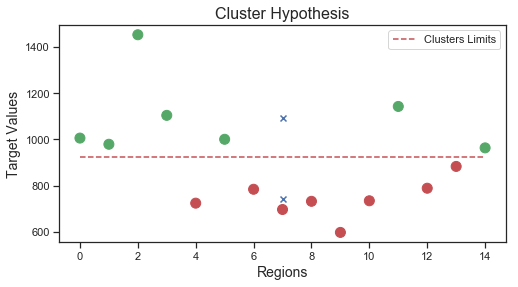

In [290]:
categories = df_final['cluster_hypothesis']
colormap = np.array(['r', 'g', 'b'])
plt.figure(figsize=(8,4))
plt.scatter(df.index, df['crimes per 100,000'], s=100, c=colormap[categories])
plt.scatter(7,centroids_only_target[0,0], marker="x", color='b')
plt.scatter(7,centroids_only_target[1,0], marker="x", color='b')
plt.title('Cluster Hypothesis',fontsize=16)
plt.plot([0,14],[923,923], 'r--',label='cluster divition')
plt.legend(['Clusters Limits'])

plt.xlabel('Regions',fontsize=14)
plt.ylabel('Target Values',fontsize=14)


plt.savefig('ScatterClassPlot.png')
plt.show()

In [247]:
# rename columns
df_final.columns=['region', 'capital', 'cluster_predictors', 'target_value', 'cluster_hypothesis',
       'clouster_venues']

In [252]:
# eliminate column capital
df_final.drop(columns='capital', inplace=True)

e:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [254]:
# reorder columns
df_final=df_final[['region', 'target_value','cluster_hypothesis','cluster_predictors',
       'clouster_venues']]

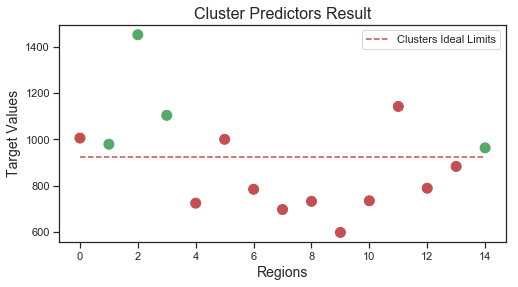

In [289]:
categories = df_final['cluster_predictors']
colormap = np.array(['r', 'g', 'b'])
plt.figure(figsize=(8,4))
plt.scatter(df.index, df['crimes per 100,000'], s=100, c=colormap[categories])
plt.title('Cluster Predictors Result',fontsize=16)
plt.plot([0,14],[923,923], 'r--',label='cluster divition')
plt.legend(['Clusters Ideal Limits'])

plt.xlabel('Regions',fontsize=14)
plt.ylabel('Target Values',fontsize=14)


plt.savefig('ScatterClassPlot.png')
plt.show()

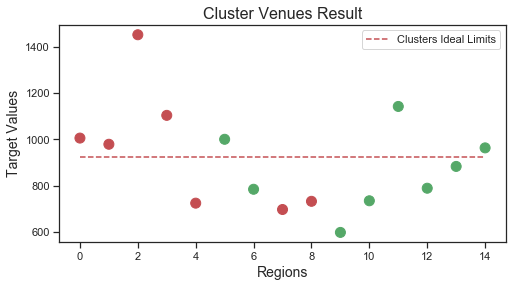

In [294]:
categories = df_final['clouster_venues']
colormap = np.array(['r', 'g', 'b'])
plt.figure(figsize=(8,4))
plt.scatter(df.index, df['crimes per 100,000'], s=100, c=colormap[categories])
plt.title('Cluster Venues Result',fontsize=16)
plt.plot([0,14],[923,923], 'r--',label='cluster divition')
plt.legend(['Clusters Ideal Limits'])

plt.xlabel('Regions',fontsize=14)
plt.ylabel('Target Values',fontsize=14)


plt.savefig('ScatterClassPlot.png')
plt.show()